## Pair Programming Group 13
### Rutuja Kokate (017453865)
### Parth Marathe (017411199)

### Here we count and display the number of image files and their corresponding label files in the training and validation datasets for a road sign detection task, showing 5325 training images and labels, and 623 validation images and labels.

In [19]:
import os

def count_files(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Define paths to our dataset
train_images_path = r"/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/images"
train_labels_path = r"/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/labels"
valid_images_path = r"/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images"
valid_labels_path = r"/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/labels"

# Count files
train_images_count = count_files(train_images_path)
train_labels_count = count_files(train_labels_path)
valid_images_count = count_files(valid_images_path)
valid_labels_count = count_files(valid_labels_path)

# Print results
print(f"Train Images: {train_images_count}")
print(f"Train Labels: {train_labels_count}")
print(f"Validation Images: {valid_images_count}")
print(f"Validation Labels: {valid_labels_count}")


Train Images: 5325
Train Labels: 5325
Validation Images: 623
Validation Labels: 623


In [20]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


### Here we retrieves and display the first image from a specified training images directory for a road sign detection task

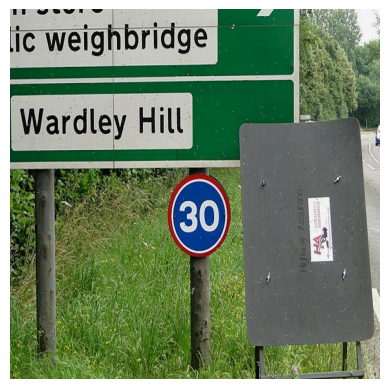

Displaying: -2021-07-12_Road_sign-_A143_road-_Ellingham-_Norfolk_jpg.rf.0db47f287353ebfbc4feff6834e239bd.jpg


In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path to the train images directory
train_images_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/images'

# Get the first image file
first_image_file = sorted(os.listdir(train_images_path))[0]
first_image_path = os.path.join(train_images_path, first_image_file)

# Open the image
img = Image.open(first_image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes for better display
plt.show()

print(f"Displaying: {first_image_file}")


## Visualizes the first five images from a road sign detection dataset by reading their corresponding bounding box annotations from label files


Processing: -2021-07-12_Road_sign-_A143_road-_Ellingham-_Norfolk_jpg.rf.0db47f287353ebfbc4feff6834e239bd.jpg with bounding box from -2021-07-12_Road_sign-_A143_road-_Ellingham-_Norfolk_jpg.rf.0db47f287353ebfbc4feff6834e239bd.txt
Class ID: 15, Class Name: Speed limit 30 Kph


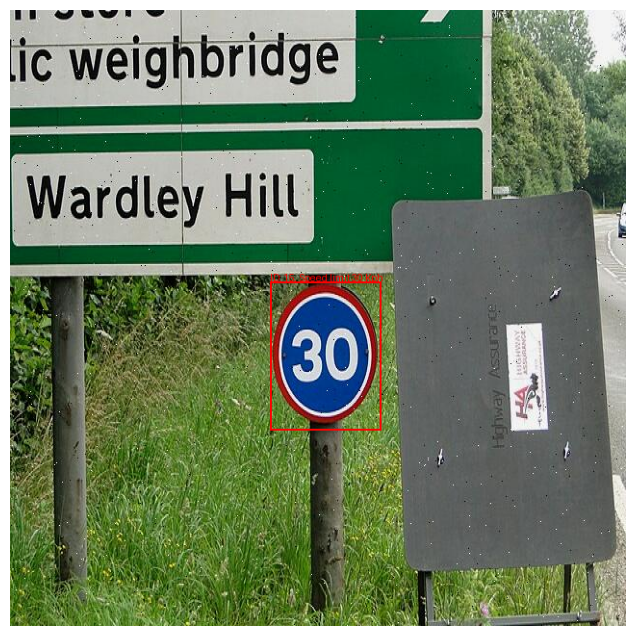


Processing: -2021-07-12_Road_sign-_A143_road-_Ellingham-_Norfolk_jpg.rf.7807e0ab76303b98bb8e6b31b492b4c7.jpg with bounding box from -2021-07-12_Road_sign-_A143_road-_Ellingham-_Norfolk_jpg.rf.7807e0ab76303b98bb8e6b31b492b4c7.txt
Class ID: 15, Class Name: Speed limit 30 Kph


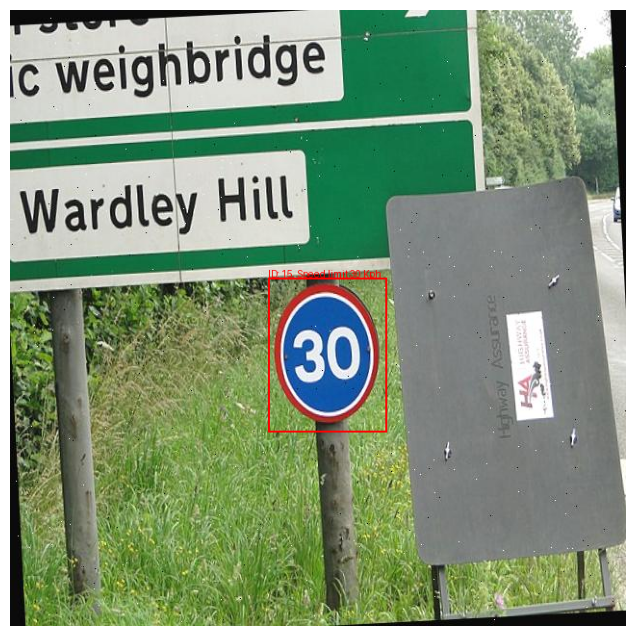


Processing: -2021-07-12_Road_sign-_A143_road-_Ellingham-_Norfolk_jpg.rf.e491cb7bbd44be85fb4af45fd224c832.jpg with bounding box from -2021-07-12_Road_sign-_A143_road-_Ellingham-_Norfolk_jpg.rf.e491cb7bbd44be85fb4af45fd224c832.txt
Class ID: 15, Class Name: Speed limit 30 Kph


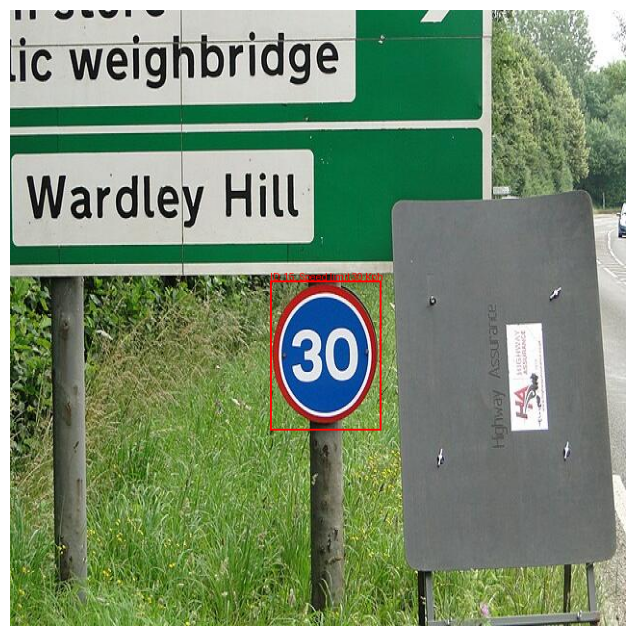


Processing: 00000_00000_00016_png_jpg.rf.5aa4aa93fa476575b4f4178247746c35.jpg with bounding box from 00000_00000_00016_png_jpg.rf.5aa4aa93fa476575b4f4178247746c35.txt
Class ID: 14, Class Name: Speed limit 20 Kph


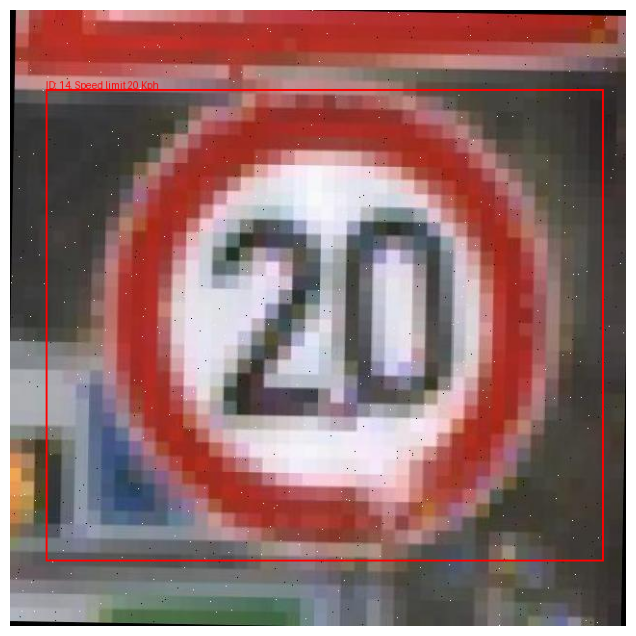


Processing: 00000_00000_00016_png_jpg.rf.5bcd7ea4a7f4f560f6a7eb2cc3c7df8a.jpg with bounding box from 00000_00000_00016_png_jpg.rf.5bcd7ea4a7f4f560f6a7eb2cc3c7df8a.txt
Class ID: 14, Class Name: Speed limit 20 Kph


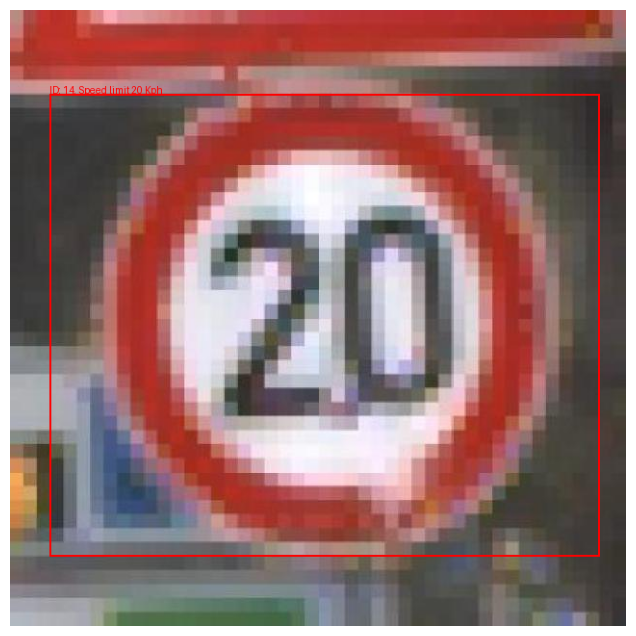

In [22]:
import yaml
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

# Load the data.yaml file to extract class names
with open('/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

class_names = data['names']  # List of class names

# Get the first 5 image files and corresponding label files
image_files = sorted(os.listdir(train_images_path))[:5]  # First 5 images

for image_file in image_files:
    label_file = image_file.replace('.jpg', '.txt')  # Adjust for our image format

    # Full paths to the image and label
    image_path = os.path.join(train_images_path, image_file)
    label_path = os.path.join(train_labels_path, label_file)

    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)
    width, height = img.size

    print(f"\nProcessing: {image_file} with bounding box from {label_file}")

    # Read the label file and draw bounding boxes with class ID and name
    with open(label_path, 'r') as f:
        for line in f:
            # Extract class_id, x_center, y_center, width, and height
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())

            # Convert normalized values to pixel coordinates
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            # Calculate top-left and bottom-right corners of the bounding box
            x_min = int(x_center - box_width / 2)
            y_min = int(y_center - box_height / 2)
            x_max = int(x_center + box_width / 2)
            y_max = int(y_center + box_height / 2)

            # Get the class name from the class ID
            class_name = class_names[int(class_id)]

            # Draw the bounding box and class label
            draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=2)
            draw.text((x_min, y_min - 10), f"ID: {int(class_id)}, {class_name}", fill="red")

            # Print class ID and name to the console
            print(f"Class ID: {int(class_id)}, Class Name: {class_name}")

    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')  # Hide axes for cleaner display
    plt.show()


## 7. Perform necessary data transformation and augmentation steps

### Applies data augmentation transformations to images from a specified directory and displays a limited number of these augmented images. The transformations include random rotations, horizontal and vertical flips, color jittering, resizing, and conversion to tensor format.

In [3]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Define paths to our dataset
train_images_path = r"/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/images"
valid_images_path = r"/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images"
test_images_path = r"/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test"

# Define data augmentation transformations
data_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Function to augment and display a limited number of images
def augment_and_display_limited_images(image_dir, num_total=4, dataset_name=""):
    """Display a total of 'num_total' augmented images from the given directory."""
    plt.figure(figsize=(15, 5))
    displayed_count = 0

    print(f"Displaying {num_total} augmented images from {dataset_name}:")

    for img_file in os.listdir(image_dir):
        if displayed_count >= num_total:
            break  # Stop once 'num_total' images have been displayed

        if img_file.endswith(".jpg") or img_file.endswith(".png"):
            img_path = os.path.join(image_dir, img_file)
            img = Image.open(img_path)

            # Apply transformation and convert back to PIL for display
            augmented_img = data_transforms(img)
            augmented_img = transforms.ToPILImage()(augmented_img)

            # Plot the augmented image
            plt.subplot(1, num_total, displayed_count + 1)
            plt.imshow(augmented_img)
            plt.axis('off')

            displayed_count += 1

    plt.tight_layout()
    plt.show()

## 8. Plot some random images from the train, test, and validation set

Displaying 4 augmented images from Train Set:


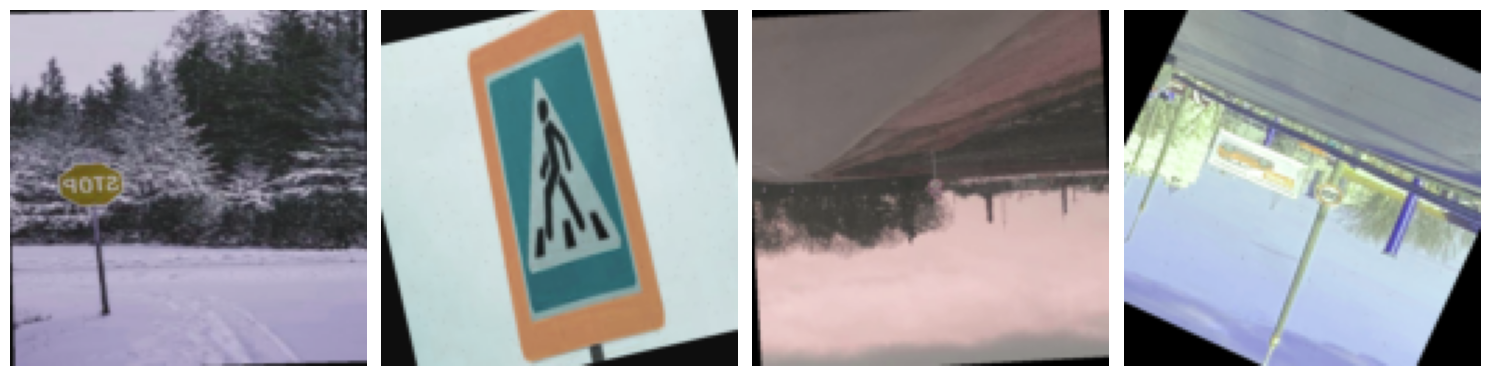

In [4]:
# Display 4 images from each dataset
augment_and_display_limited_images(train_images_path, num_total=4, dataset_name="Train Set")


Displaying 4 augmented images from Validation Set:


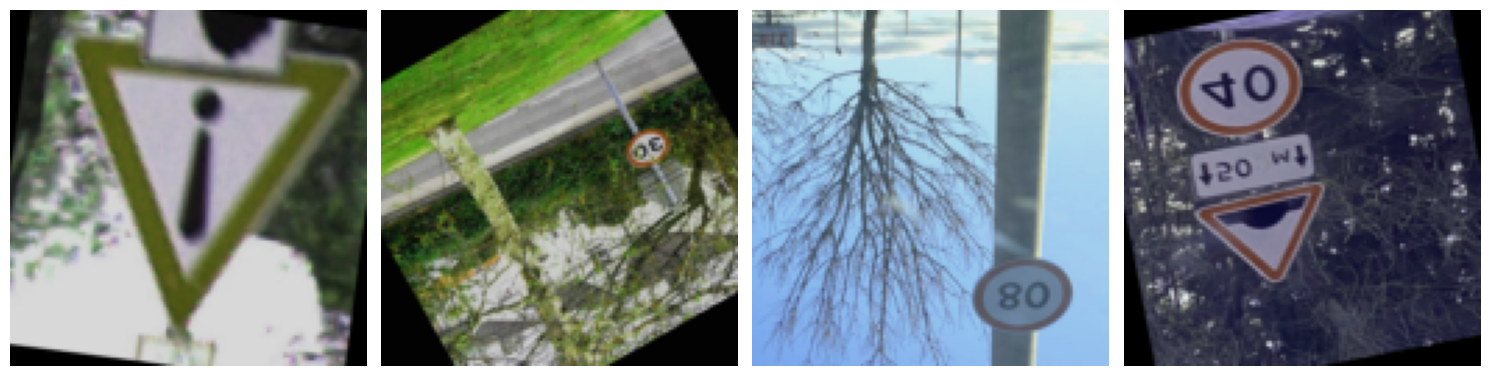

In [5]:
augment_and_display_limited_images(valid_images_path, num_total=4, dataset_name="Validation Set")


Displaying 4 augmented images from Test Set:


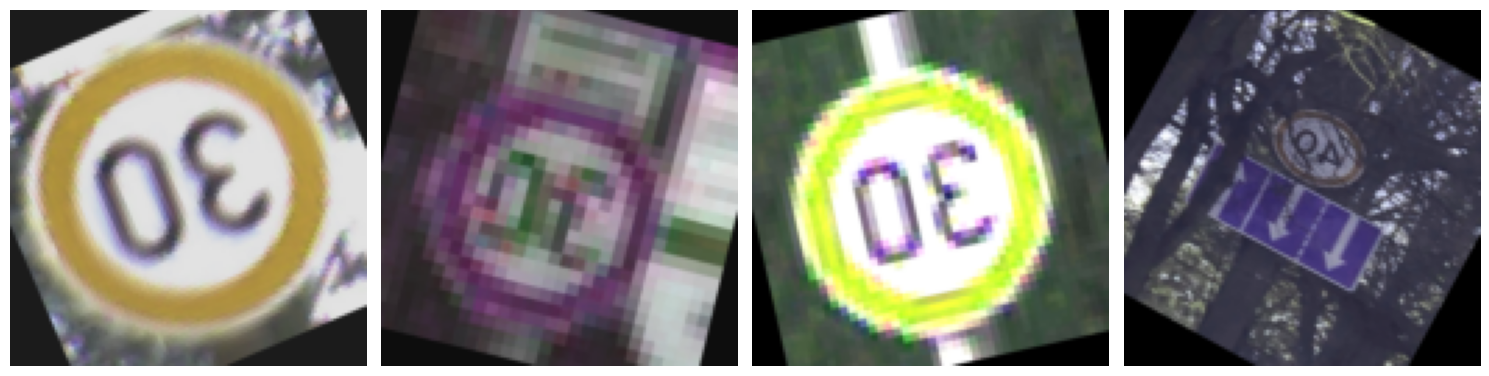

In [6]:
augment_and_display_limited_images(test_images_path, num_total=4, dataset_name="Test Set")

### Dictionary called class_names, which maps integer class indices (ranging from 0 to 24) to their corresponding descriptive names for road signs. This mapping will be useful for interpreting model predictions and visualizing results by providing meaningful labels instead of just numeric indices.¶

In [3]:
# Define the mapping of class indices to class names
class_names = {
    0: "Road narrows on right",
    1: "Attention Please-",
    2: "Beware of children",
    3: "CYCLE ROUTE AHEAD WARNING",
    4: "Crosswalk",
    5: "Dangerous Left Curve Ahead",
    6: "Dangerous Right Curve Ahead",
    7: "No Entry",
    8: "No Over Taking",
    9: "One way road",
    10: "Speed bump ahead",
    11: "Speed limit",
    12: "Speed limit 100 Kph",
    13: "Speed limit 120 Kph",
    14: "Speed limit 20 Kph",
    15: "Speed limit 30 Kph",
    16: "Speed limit 40 Kph",
    17: "Speed limit 50 Kph",
    18: "Speed limit 60 Kph",
    19: "Speed limit 70 Kph",
    20: "Speed limit 80 Kph",
    21: "Speed limit 90 Kph",
    22: "Stop Sign",
    23: "Uneven Road",
    24: "Roundabout",
}

## 9. Pick one model of your choice and implement it from scratch to perform object detection

### Simple convolutional neural network (CNN) model in PyTorch for classifying images and predicting bounding boxes. The SimpleCNN class includes two convolutional layers for feature extraction, followed by a max pooling layer and two fully connected layers for classification and bounding box regression.

### The forward method processes input data to produce both class predictions and bounding box coordinates. Additionally, it specifies data transformations to resize images to 128x128 pixels and convert them into tensor format, making it suitable for tasks like road sign recognition, where both identification and localization are needed

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # (16, 128, 128)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # (32, 128, 128)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # (32, 64, 64)
        self.fc1 = nn.Linear(32 * 64 * 64, 128)  # Adjust for flattened size
        self.fc2 = nn.Linear(128, num_classes)  # Classification output
        self.fc_bbox = nn.Linear(128, 4)  # Bounding box output

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        class_out = self.fc2(x)
        bbox_out = self.fc_bbox(x)
        return class_out, bbox_out

# Transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

### We define a custom dataset class RoadSignDataset for loading images and their corresponding bounding box labels

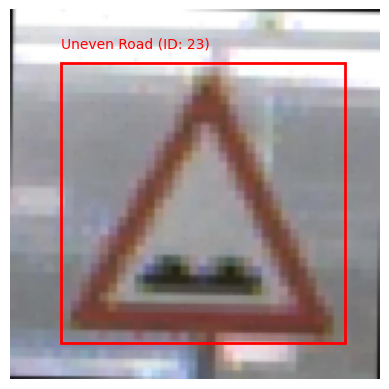

In [24]:
class RoadSignDataset(Dataset):
    def __init__(self, images_path, labels_path, transform=None):
        self.images_path = images_path
        self.labels_path = labels_path
        self.transform = transform
        self.data = self.load_labels()

    def load_labels(self):
        data = []
        image_files = [f for f in os.listdir(self.images_path) if f.endswith(('.png', '.jpg'))]
        label_files = os.listdir(self.labels_path)

        for image_file in image_files:
            base_name = os.path.splitext(image_file)[0]
            corresponding_labels = [label for label in label_files if base_name in label]

            for label_file in corresponding_labels:
                label_path = os.path.join(self.labels_path, label_file)
                try:
                    with open(label_path, 'r') as f:
                        for line in f:
                            if line.strip():
                                parts = line.split()
                                label = int(parts[0])
                                if 0 <= label < 25:  # Validate label range
                                    bbox = [float(x) for x in parts[1:]]
                                    data.append((image_file, label, bbox))
                except Exception as e:
                    print(f"Error reading {label_path}: {e}")
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_file, label, bbox = self.data[idx]
        image_path = os.path.join(self.images_path, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label, torch.tensor(bbox, dtype=torch.float32)

def show_image_with_bbox(image, bbox, label):
    """Visualize the image with bounding boxes using matplotlib."""
    plt.imshow(image.permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    x_center, y_center, width, height = bbox

    # Convert normalized values to pixel coordinates (assuming 128x128 image)
    x_center *= 128
    y_center *= 128
    width *= 128
    height *= 128

    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)

    # Draw the bounding box
    plt.gca().add_patch(plt.Rectangle(
        (x_min, y_min), width, height, edgecolor='red', facecolor='none', lw=2
    ))

    # Display class label
    class_name = class_names.get(label, "Unknown Class")  # Get the class name from the mapping
    plt.text(x_min, y_min - 5, f"{class_name} (ID: {label})", color='red', fontsize=10)
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage with DataLoader
train_dataset = RoadSignDataset(
    images_path='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/images',
    labels_path='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/labels',
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Display the first few images with bounding boxes
for images, labels, bboxes in train_loader:
    image = images[0]  # Get the first image in the batch
    label = labels[0].item()
    bbox = bboxes[0].numpy()
    show_image_with_bbox(image, bbox, label)
    break  # Stop after displaying one image for demo


### For training, two loss functions are defined: CrossEntropyLoss for handling the classification tasks and MSELoss for regression of the bounding box coordinates. The Adam optimizer is then initialized to update the model's parameters based on the calculated losses during training. This setup prepares the model for a training loop where it will learn to detect and classify road signs from input images

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Assuming SimpleCNN and RoadSignDataset are already defined

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=25).to(device)

# Loss functions for classification and bounding box regression
criterion_class = nn.CrossEntropyLoss()
criterion_bbox = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


### calculate_iou function computes the Intersection over Union (IoU) metric for evaluating the accuracy of predicted bounding boxes against ground truth bounding boxes.

In [ ]:
# IoU function
def calculate_iou(pred_box, true_box):
    """Calculate Intersection over Union (IoU) for two bounding boxes."""
    x1_pred, y1_pred, x2_pred, y2_pred = pred_box[:, 0], pred_box[:, 1], pred_box[:, 2], pred_box[:, 3]
    x1_true, y1_true, x2_true, y2_true = true_box[:, 0], true_box[:, 1], true_box[:, 2], true_box[:, 3]

    x1_inter = torch.max(x1_pred, x1_true)
    y1_inter = torch.max(y1_pred, y1_true)
    x2_inter = torch.min(x2_pred, x2_true)
    y2_inter = torch.min(y2_pred, y2_true)

    inter_area = torch.clamp(x2_inter - x1_inter, min=0) * torch.clamp(y2_inter - y1_inter, min=0)
    area_pred = (x2_pred - x1_pred) * (y2_pred - y1_pred)
    area_true = (x2_true - x1_true) * (y2_true - y1_true)
    union_area = area_pred + area_true - inter_area

    return (inter_area / union_area).mean().item()

### The calculate_map function computes the Mean Average Precision (mAP) for evaluating object detection models. It iterates through each class (here 25), collecting predicted and ground truth bounding boxes

In [ ]:
def calculate_map(pred_boxes, true_boxes, iou_threshold=0.5):
    """Calculate Mean Average Precision (mAP)."""
    average_precisions = []

    for c in range(25):  # Assuming 25 classes
        class_pred_boxes = [pred for pred in pred_boxes if pred[1] == c]
        class_true_boxes = [true for true in true_boxes if true[1] == c]

        # Sort boxes by score
        class_pred_boxes.sort(key=lambda x: x[0], reverse=True)

        tp = torch.zeros(len(class_pred_boxes))
        fp = torch.zeros(len(class_pred_boxes))
        num_true = len(class_true_boxes)

        for i, pred in enumerate(class_pred_boxes):
            pred_box = pred[2]
            matched = False

            for true in class_true_boxes:
                true_box = true[2]
                iou = calculate_iou(pred_box.unsqueeze(0), true_box.unsqueeze(0))

                if iou >= iou_threshold:
                    tp[i] = 1  # True positive
                    matched = True
                    break

            if not matched:
                fp[i] = 1  # False positive

        # Calculate precision and recall
        tp_cumsum = torch.cumsum(tp, dim=0)
        fp_cumsum = torch.cumsum(fp, dim=0)

        precision = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-16)
        recall = tp_cumsum / (num_true + 1e-16)

        # Average Precision (AP)
        ap = 0.0
        if num_true > 0:
            for t in torch.linspace(0, 1, 11):  # 11-point interpolated average precision
                p_at_recall_t = precision[recall >= t].max() if (recall >= t).any() else 0
                ap += p_at_recall_t

            ap /= 11  # Normalize by 11 points

        average_precisions.append(ap)

    return sum(average_precisions) / len(average_precisions)  # mAP over all classes

# Lists to store metrics for plotting
epoch_losses = []
epoch_accuracies = []
epoch_iou = []
epoch_map = []

### The training loop trains the model for 40 epochs, Loops through the training data, moving images, labels, and bounding boxes, Computes class predictions and bounding box outputs.

### Calculates and combines classification and bounding box regression losses, then updates the model through backpropagation.

## 10. Compute the IOU of your results with the test set and print a few predicted images

In [26]:
# Training loop
for epoch in range(40):  # Train for 40 epochs
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    total_iou = 0.0
    all_pred_boxes = []  # Store all predicted boxes
    all_true_boxes = []  # Store all true boxes

    for images, labels, bboxes in train_loader:
        images, labels, bboxes = images.to(device), labels.to(device), bboxes.to(device)

        # Forward pass
        class_out, bbox_out = model(images)

        # Calculate losses
        loss_class = criterion_class(class_out, labels)
        loss_bbox = criterion_bbox(bbox_out, bboxes)

        # Combine losses
        loss = loss_class + loss_bbox

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(class_out, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Calculate IoU
        total_iou += calculate_iou(bbox_out, bboxes)

        # Store predictions and true boxes for mAP calculation
        for i in range(len(predicted)):
            score = torch.max(class_out[i])  # Get the score of the predicted class
            all_pred_boxes.append((score.item(), predicted[i].item(), bbox_out[i].detach().cpu()))
            all_true_boxes.append((1.0, labels[i].item(), bboxes[i].detach().cpu()))  # Assume perfect ground truth score

    # Compute average metrics for the epoch
    epoch_loss = running_loss / len(train_loader)
    accuracy = correct / total * 100
    avg_iou = total_iou / len(train_loader)

    # Calculate mAP
    mAP = calculate_map(all_pred_boxes, all_true_boxes)

    # Store metrics for plotting
    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(accuracy)
    epoch_iou.append(avg_iou)
    epoch_map.append(mAP)

    # Print metrics for each epoch
    print(f"Epoch [{epoch + 1}/40], Loss: {epoch_loss:.4f}, "
          f"Accuracy: {accuracy:.2f}%, IoU: {avg_iou:.4f}, mAP: {mAP:.4f}")



Epoch [1/40], Loss: 2.0854, Accuracy: 37.61%, IoU: 0.0651, mAP: 0.0451
Epoch [2/40], Loss: 1.0564, Accuracy: 67.07%, IoU: 0.0874, mAP: 0.0713
Epoch [3/40], Loss: 0.7185, Accuracy: 74.94%, IoU: 0.0981, mAP: 0.0803
Epoch [4/40], Loss: 0.6173, Accuracy: 76.82%, IoU: 0.1035, mAP: 0.0972
Epoch [5/40], Loss: 0.5465, Accuracy: 78.16%, IoU: 0.1115, mAP: 0.1073
Epoch [6/40], Loss: 0.5040, Accuracy: 78.31%, IoU: 0.1203, mAP: 0.1246
Epoch [7/40], Loss: 0.4726, Accuracy: 78.87%, IoU: 0.1293, mAP: 0.1371
Epoch [8/40], Loss: 0.4485, Accuracy: 78.36%, IoU: 0.1346, mAP: 0.1513
Epoch [9/40], Loss: 0.4372, Accuracy: 78.34%, IoU: 0.1437, mAP: 0.1689
Epoch [10/40], Loss: 0.4122, Accuracy: 79.25%, IoU: 0.1485, mAP: 0.1811
Epoch [11/40], Loss: 0.4105, Accuracy: 79.19%, IoU: 0.1513, mAP: 0.1835
Epoch [12/40], Loss: 0.3975, Accuracy: 78.87%, IoU: 0.1586, mAP: 0.1964
Epoch [13/40], Loss: 0.3888, Accuracy: 79.13%, IoU: 0.1566, mAP: 0.1953
Epoch [14/40], Loss: 0.3954, Accuracy: 79.04%, IoU: 0.1634, mAP: 0.1973
E

### Saving the model weights allowing to preserve the model's learned parameters for later use, such as for inference or further training

In [28]:
# Specify the path to save the model weights
model_save_path = 'simple_cnn_weights.pth'

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f'Model weights saved to {model_save_path}')


Model weights saved to simple_cnn_weights.pth


## 12.Show tables and graphs of how the results change

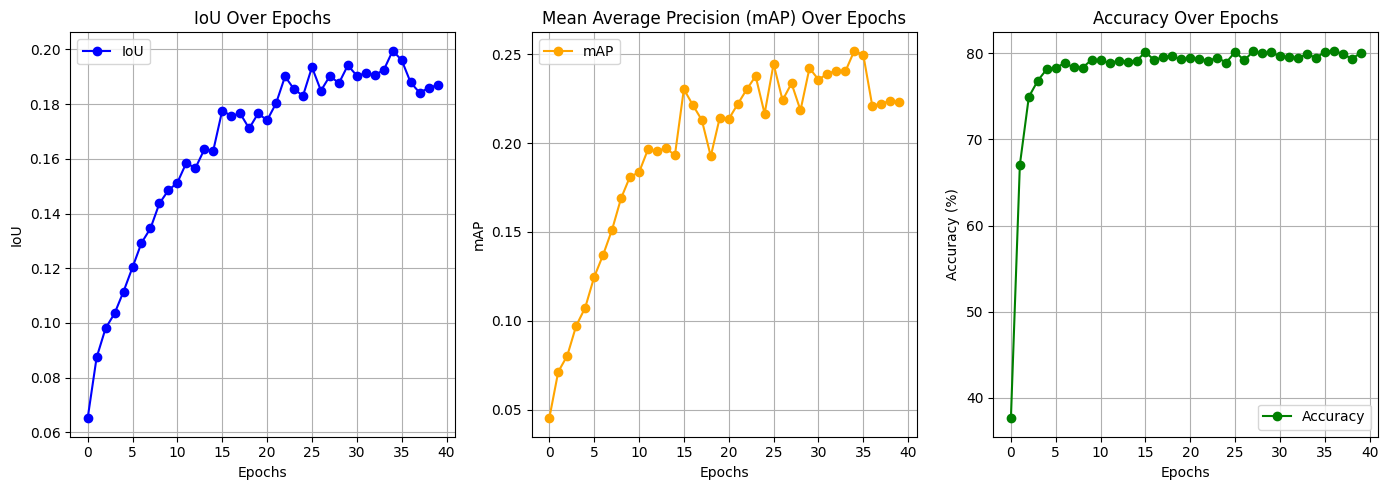

In [29]:
# Plotting the metrics
plt.figure(figsize=(14, 5))

# Plot IoU
plt.subplot(1, 3, 1)
plt.plot(epoch_iou, label='IoU', color='blue', marker='o')
plt.title('IoU Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.grid()
plt.legend()

# Plot mAP
plt.subplot(1, 3, 2)
plt.plot(epoch_map, label='mAP', color='orange', marker='o')
plt.title('Mean Average Precision (mAP) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.grid()
plt.legend()

# Plot Accuracy
plt.subplot(1, 3, 3)
plt.plot(epoch_accuracies, label='Accuracy', color='green', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## 10. Print a few predicted images

Image: 00001_00022_00029_png_jpg.rf.444e54096a8295b8e03495b68ba4a176.jpg, Predicted label: 15


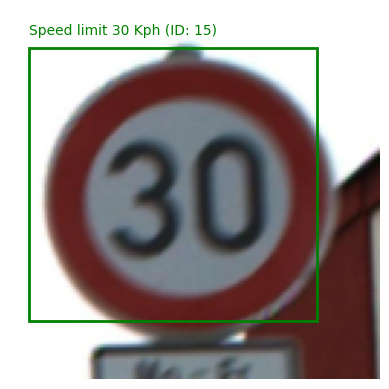

Image: road413_png.rf.8107b72aa82733b2f205542a988ffbf8.jpg, Predicted label: 12


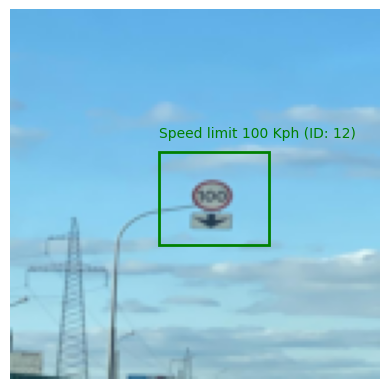

Image: road277_png.rf.d450897af73e8b0e85aa3188d9ff3b4d.jpg, Predicted label: 20


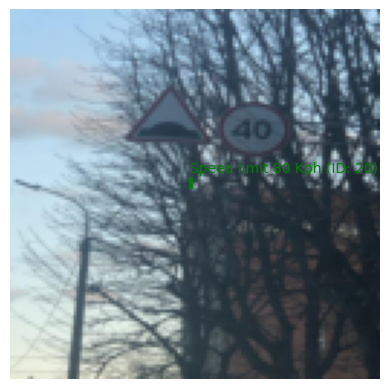

Image: 00000_00002_00029_png_jpg.rf.c4f12857b8783cdb7cc5c6346675c0a0.jpg, Predicted label: 14


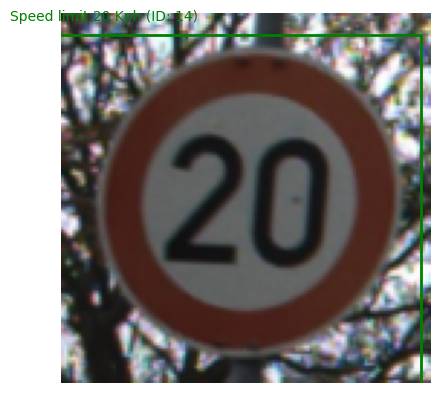

In [42]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import os
import random

# Define transformations to apply to test images (adjust as needed)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize image to model input size
    transforms.ToTensor(),          # Convert image to tensor
])

# Function to visualize predictions with bounding boxes and class labels
def show_predicted_image(image, pred_bbox, pred_label):
    """Visualize the predicted image with bounding boxes."""
    plt.imshow(image.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C)
    x_center, y_center, width, height = pred_bbox

    # Convert normalized values to pixel coordinates (assuming 128x128 images)
    x_center *= 128
    y_center *= 128
    width *= 128
    height *= 128

    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)

    # Draw the bounding box
    plt.gca().add_patch(plt.Rectangle(
        (x_min, y_min), width, height, edgecolor='green', facecolor='none', lw=2
    ))

    # Ensure the predicted label is valid
    class_name = class_names.get(pred_label, "Unknown Class")

    # Display class label
    plt.text(x_min, y_min - 5, f"{class_name} (ID: {pred_label})", 
             color='green', fontsize=10)
    plt.axis('off')  # Hide axis
    plt.show()

# Load the trained model and set it to evaluation mode
model.eval()

# Path to the test folder containing images
test_folder = "/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test"  # Replace with actual path

# Get a list of all images in the test folder
all_images = os.listdir(test_folder)

# Select 4 random images from the test folder
random_images = random.sample(all_images, min(4, len(all_images)))  # Avoid exceeding available images

# Iterate through the selected random images
with torch.no_grad():
    for image_name in random_images:
        # Load and transform the image
        image_path = os.path.join(test_folder, image_name)
        image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB mode
        input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

        # Get predictions from the model
        pred_class, pred_bbox = model(input_image)

        # Get the predicted class ID and bounding box
        _, pred_label = torch.max(pred_class, 1)
        pred_label = pred_label.item()  # Convert tensor to Python int

        # Print predicted label for debugging
        print(f"Image: {image_name}, Predicted label: {pred_label}")

        # Display the predicted image with bounding boxes
        show_predicted_image(input_image[0].cpu(), pred_bbox[0].cpu().numpy(), pred_label)


Image: 00001_00035_00023_png_jpg.rf.31eb24e48eb65de0684e016462c31d58.jpg, Predicted label: 15


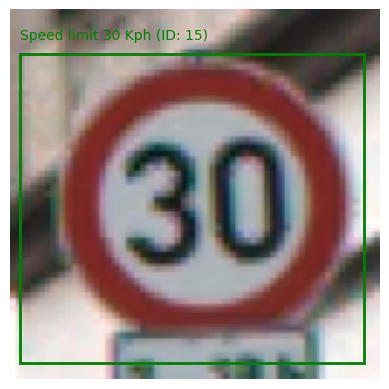

Image: 00022_00005_00028_png_jpg.rf.fc3a84982e1f029edbf89b64420f4fc4.jpg, Predicted label: 23


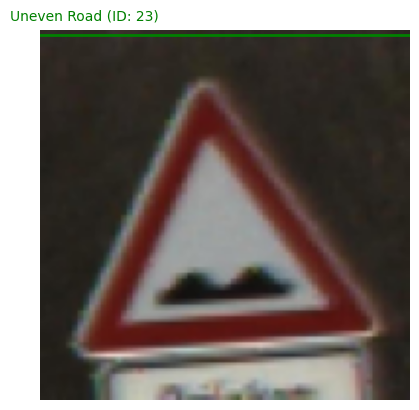

Image: 00001_00018_00023_png_jpg.rf.5b97a0b3fefd03df0b45bff42a65ee8d.jpg, Predicted label: 15


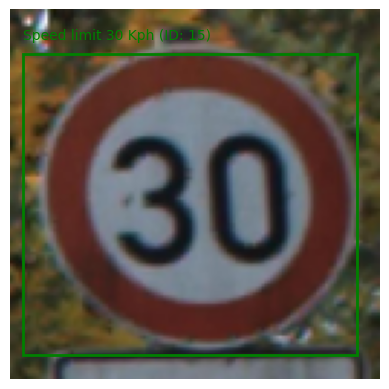

Image: 00001_00032_00021_png_jpg.rf.a48a86272c44e9a052b458eb6110b8ac.jpg, Predicted label: 15


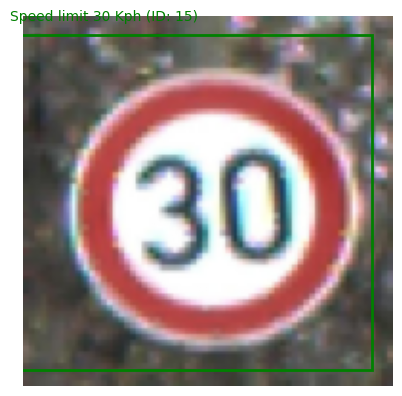

In [8]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import os
import random

# Define transformations to apply to test images (adjust as needed)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize image to model input size
    transforms.ToTensor(),          # Convert image to tensor
])

# Function to visualize predictions with bounding boxes and class labels
def show_predicted_image(image, pred_bbox, pred_label):
    """Visualize the predicted image with bounding boxes."""
    plt.imshow(image.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C)
    x_center, y_center, width, height = pred_bbox

    # Convert normalized values to pixel coordinates (assuming 128x128 images)
    x_center *= 128
    y_center *= 128
    width *= 128
    height *= 128

    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)

    # Draw the bounding box
    plt.gca().add_patch(plt.Rectangle(
        (x_min, y_min), width, height, edgecolor='green', facecolor='none', lw=2
    ))

    # Ensure the predicted label is valid
    class_name = class_names.get(pred_label, "Unknown Class")

    # Display class label
    plt.text(x_min, y_min - 5, f"{class_name} (ID: {pred_label})", 
             color='green', fontsize=10)
    plt.axis('off')  # Hide axis
    plt.show()

# Load the trained model and set it to evaluation mode
model.eval()

# Path to the test folder containing images
test_folder = "/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test"  # Replace with actual path

# Get a list of all images in the test folder
all_images = os.listdir(test_folder)

# Select 4 random images from the test folder
random_images = random.sample(all_images, min(4, len(all_images)))  # Avoid exceeding available images

# Iterate through the selected random images
with torch.no_grad():
    for image_name in random_images:
        # Load and transform the image
        image_path = os.path.join(test_folder, image_name)
        image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB mode
        input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

        # Get predictions from the model
        pred_class, pred_bbox = model(input_image)

        # Get the predicted class ID and bounding box
        _, pred_label = torch.max(pred_class, 1)
        pred_label = pred_label.item()  # Convert tensor to Python int

        # Print predicted label for debugging
        print(f"Image: {image_name}, Predicted label: {pred_label}")

        # Display the predicted image with bounding boxes
        show_predicted_image(input_image[0].cpu(), pred_bbox[0].cpu().numpy(), pred_label)


### Saving model Predictions into a CSV file with Image ID and Prediction columns

In [6]:
import torch
import torch.nn as nn
import os
import pandas as pd
from PIL import Image
from torchvision import transforms

# Load the model and weights
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=len(class_names)).to(device)

# Load trained weights
weights_path = "/kaggle/input/rutuja-weights/simple_cnn_weights.pth"  # Replace with our path
model.load_state_dict(torch.load(weights_path, map_location=device, weights_only=True))
model.eval()  # Set the model to evaluation mode

# Define transformations to apply to test images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to match input size
    transforms.ToTensor(),          # Convert image to tensor
])

# Path to the test folder containing images
test_folder = "/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test"  # Replace with our actual path

# Initialize a list to store results
results = []

# Iterate through all images in the test folder
with torch.no_grad():
    for image_name in os.listdir(test_folder):
        image_path = os.path.join(test_folder, image_name)
        
        # Load and transform the image
        image = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

        # Get predictions from the model
        outputs = model(input_image)

        # If the model returns a tuple, take the first element (the logits)
        if isinstance(outputs, tuple):
            outputs = outputs[0]

        # Ensure the outputs are in the correct shape (batch_size, num_classes)
        _, pred_label = outputs.max(1)  # Get the predicted class ID along dimension 1
        pred_label = pred_label.item()  # Convert to int



        # Map predicted class ID to class name
        predicted_class = class_names.get(pred_label, "Unknown Class")

        # Append result to the list
        results.append({
            "Test image name": image_name,
            "Predicted class label": predicted_class
        })

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
output_csv = "predictions.csv"
df.to_csv(output_csv, index=False)

print(f"Predictions saved to {output_csv}")


Predictions saved to predictions.csv


### Bounding box coordinate files of predicted images

In [4]:
import torch
import pandas as pd
from PIL import Image
from torchvision import transforms
import os

# Load the model and weights
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=len(class_names)).to(device)

# Load trained weights
weights_path = "/kaggle/input/rutuja-weights/simple_cnn_weights.pth"  # Replace with our path
model.load_state_dict(torch.load(weights_path, map_location=device, weights_only=True))
model.eval()  # Set the model to evaluation mode

# Define transformations to apply to test images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to match input size
    transforms.ToTensor(),          # Convert image to tensor
])

# Path to the test folder containing images
test_folder = "/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test"  # Replace with our actual path

# Initialize a list to store results
results = []

# Iterate through all images in the test folder
with torch.no_grad():
    for image_name in os.listdir(test_folder):
        image_path = os.path.join(test_folder, image_name)
        
        # Load and transform the image
        image = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

        # Get predictions from the model
        outputs = model(input_image)

        # Debug: Check if outputs is a tuple
        if isinstance(outputs, tuple):
            print(f"Outputs for {image_name} is a tuple with length: {len(outputs)}")  # Check output structure
        else:
            print(f"Outputs for {image_name} is a tensor with shape: {outputs.shape}")

        # Assuming outputs consist of class scores and bounding boxes
        if isinstance(outputs, tuple) and len(outputs) == 2:
            class_scores, bbox_out = outputs  # If our model returns two outputs
        else:
            # Handle the case where outputs is a single tensor or other structure
            raise ValueError("Unexpected output format from the model. Please check the model's output structure.")

        # Get the predicted class ID
        _, pred_label = class_scores.max(1)  # Get the predicted class ID along dimension 1
        pred_label = pred_label.item()  # Convert to int

        # Get bounding box coordinates
        pred_bbox = bbox_out.detach().cpu().numpy().flatten()  # Assuming bbox is in [x1, y1, x2, y2] format

        # Map predicted class ID to class name
        predicted_class = class_names.get(pred_label, "Unknown Class")

        # Append result to the list
        results.append({
            "Test image name": image_name,
            "Predicted class label": predicted_class,
            "Bounding box coordinates": pred_bbox.tolist()  # Convert to list for better CSV formatting
        })

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
output_csv = "predictions_with_bboxes.csv"
df.to_csv(output_csv, index=False)

print(f"Predictions saved to {output_csv}")


Predictions saved to predictions_with_bboxes
